In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Load the dataset
weather_data = pd.read_csv('/content/gdrive/MyDrive/Data Preprocessing Datasets/weather_2016_2020_daily.csv')

**Data Preprocessing and Cleaning**

In [ ]:
# Check for missing values in the dataset
missing_values = weather_data.isnull().sum()

# Display the number of missing values for each column
missing_values

Date           0
Day            0
Temp_max       0
Temp_avg       0
Temp_min       0
Dew_max        0
Dew_avg        0
Dew_min        0
Hum_max        0
Hum_avg        0
Hum_min        0
Wind_max       0
Wind_avg       0
Wind_min       0
Press_max      0
Press_avg      0
Press_min      0
Precipit       0
day_of_week    0
dtype: int64

In [ ]:
# Check the data types of each column
data_types = weather_data.dtypes

# Display the data types
data_types

Date            object
Day              int64
Temp_max         int64
Temp_avg       float64
Temp_min         int64
Dew_max          int64
Dew_avg        float64
Dew_min          int64
Hum_max          int64
Hum_avg        float64
Hum_min          int64
Wind_max         int64
Wind_avg       float64
Wind_min         int64
Press_max      float64
Press_avg      float64
Press_min      float64
Precipit       float64
day_of_week      int64
dtype: object

In [ ]:
# Convert the 'Date' column to datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
updated_data_types = weather_data.dtypes

In [ ]:
# Get a summary of the numerical columns
numerical_summary = weather_data.describe()

# Display the summary
numerical_summary

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.00000,498.000000,498.000000,498.000000
mean,15.514056,84.373494,74.923695,66.823293,68.877510,64.854217,60.110442,91.678715,73.275301,49.997992,15.903614,7.584137,1.232932,29.950402,29.88755,29.760843,0.211526,2.989960
std,8.839322,10.510944,10.225102,11.287219,10.398259,11.841687,13.549887,7.446468,10.803242,14.041115,4.801361,3.070056,2.469524,0.160011,0.16100,1.344806,0.939404,1.994434
min,1.000000,43.000000,29.900000,21.000000,19.000000,15.200000,10.000000,50.000000,31.500000,15.000000,6.000000,2.000000,0.000000,29.500000,28.80000,0.000000,0.000000,0.000000
25%,8.000000,79.000000,70.225000,60.000000,66.000000,60.300000,54.000000,90.000000,67.025000,41.000000,13.000000,5.500000,0.000000,29.900000,29.80000,29.700000,0.000000,1.000000
50%,15.000000,86.000000,77.250000,70.000000,73.000000,69.500000,66.000000,93.500000,74.500000,49.000000,15.000000,7.100000,0.000000,29.900000,29.90000,29.800000,0.000000,3.000000
75%,23.000000,92.000000,82.300000,76.000000,76.000000,73.700000,70.000000,97.000000,80.675000,58.000000,18.000000,9.000000,0.000000,30.000000,30.00000,29.900000,0.020000,5.000000
max,31.000000,100.000000,89.800000,83.000000,79.000000,76.400000,74.000000,100.000000,96.800000,90.000000,36.000000,23.900000,17.000000,30.600000,30.50000,30.400000,13.430000,6.000000


**Clustering, Anomaly Detection, and Data Preparation**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop non-numerical columns
data_for_clustering = weather_data.drop(columns=['Date', 'Day'])

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

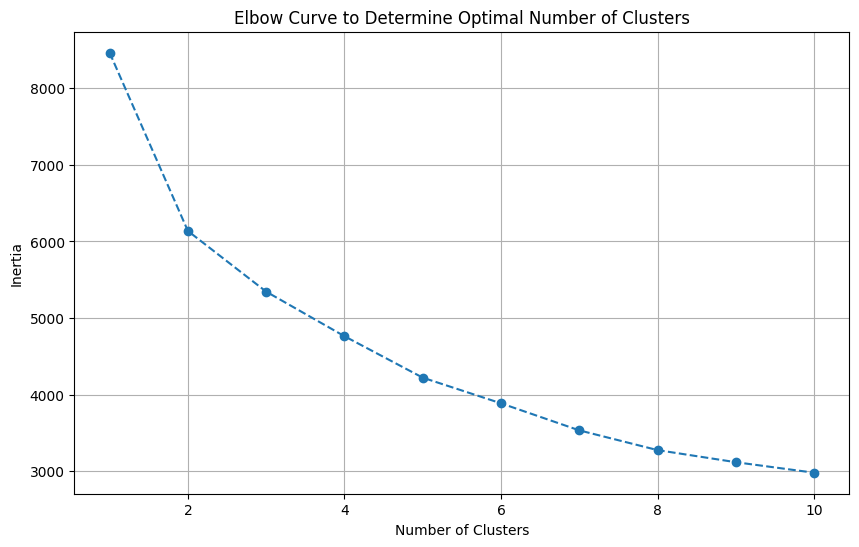

In [ ]:
# Use the elbow method to find the optimal number of clusters for KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [ ]:
# Cluster the data using 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
weather_data['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate the distance to the closest centroid for each data point
distances = kmeans.transform(scaled_data)
min_distances = distances.min(axis=1)

In [ ]:
import numpy as np

# Set a threshold for anomaly detection (for example, 95th percentile of the distances)
threshold = np.percentile(min_distances, 95)

In [ ]:
# Detect anomalies
anomalies = weather_data[min_distances > threshold]

In [ ]:
# Display the detected anomalies
anomalies

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,Cluster
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5,0
116,2016-09-25,25,89,76.9,73,77,73.4,71,100,89.3,61,36,7.0,0,29.9,29.9,29.8,0.69,6,2
186,2016-04-12,4,53,51.9,50,52,50.0,49,100,93.2,89,15,10.3,0,29.9,28.8,0.0,0.00,1,0
187,2016-05-12,5,54,51.7,50,53,49.9,48,100,93.7,89,16,7.7,0,29.8,29.7,29.6,1.10,3,0
189,2016-07-12,7,57,52.6,48,54,49.7,45,96,89.8,83,10,6.1,0,30.1,30.0,29.9,0.00,1,0
190,2016-08-12,8,56,47.6,40,54,40.2,29,93,76.4,59,26,18.6,10,30.5,30.3,30.1,0.28,4,1
200,2016-12-18,18,43,38.1,33,35,22.0,18,74,52.9,40,26,20.0,14,30.4,30.2,30.0,0.00,6,1
201,2016-12-19,19,49,39.0,30,20,16.5,14,59,42.4,25,17,11.0,3,30.5,30.5,30.4,0.00,0,1
218,2017-05-01,5,56,50.4,44,51,45.8,38,90,84.1,77,20,7.0,0,29.9,29.8,29.8,0.00,0,0
219,2017-06-01,6,44,35.1,26,38,28.7,18,89,77.8,66,23,15.8,9,30.4,30.1,29.9,0.00,3,1


**Building ML Models including ensemble model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [ ]:
from sklearn.model_selection import train_test_split

target = 'Temp_avg'
features = [col for col in weather_data.columns if col not in ['Date', 'Day', 'Temp_avg']]

X = weather_data[features]
y = weather_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the models and evaluate them
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[model_name] = mean_absolute_error(y_test, y_pred)

In [ ]:
scores

{'Linear Regression': 0.2970710724458207,
 'Decision Tree': 1.088,
 'Random Forest': 0.7217200000000014,
 'Gradient Boosting': 0.709843702249288}